In [1]:
# Need this for matrix multiplication to work for some reason lol
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

from vae import VAE

In [3]:
bs = 100
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

C:\Users\Alex Guerra\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
# build model
vae = VAE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=2)
if torch.cuda.is_available():
    vae.cuda()

In [14]:
optimizer = optim.Adam(vae.parameters())
# return reconstruction error + KL divergence losses
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [15]:
def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.cuda()
        optimizer.zero_grad()
        
        recon_batch, mu, log_var = vae(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

def test():
    vae.eval()
    test_loss= 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.cuda()
            recon, mu, log_var = vae(data)
            
            # sum up batch loss
            test_loss += loss_function(recon, data, mu, log_var).item()
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [16]:
for epoch in range(1, 51):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 545.724922
Train Epoch: 1 [10000/60000 (17%)]	Loss: 181.711289
Train Epoch: 1 [20000/60000 (33%)]	Loss: 179.307246
Train Epoch: 1 [30000/60000 (50%)]	Loss: 170.712051
Train Epoch: 1 [40000/60000 (67%)]	Loss: 172.422852
Train Epoch: 1 [50000/60000 (83%)]	Loss: 159.434941
====> Epoch: 1 Average loss: 177.0526
====> Test set loss: 162.0121
Train Epoch: 2 [0/60000 (0%)]	Loss: 158.038008
Train Epoch: 2 [10000/60000 (17%)]	Loss: 160.562100
Train Epoch: 2 [20000/60000 (33%)]	Loss: 158.259111
Train Epoch: 2 [30000/60000 (50%)]	Loss: 156.014268
Train Epoch: 2 [40000/60000 (67%)]	Loss: 164.263242
Train Epoch: 2 [50000/60000 (83%)]	Loss: 152.648613
====> Epoch: 2 Average loss: 158.0220
====> Test set loss: 155.3086
Train Epoch: 3 [0/60000 (0%)]	Loss: 151.732969
Train Epoch: 3 [10000/60000 (17%)]	Loss: 141.315273
Train Epoch: 3 [20000/60000 (33%)]	Loss: 154.353887
Train Epoch: 3 [30000/60000 (50%)]	Loss: 163.711387
Train Epoch: 3 [40000/60000 (67%)]	Loss: 148.05

Train Epoch: 22 [50000/60000 (83%)]	Loss: 146.721650
====> Epoch: 22 Average loss: 140.3176
====> Test set loss: 141.5881
Train Epoch: 23 [0/60000 (0%)]	Loss: 133.138828
Train Epoch: 23 [10000/60000 (17%)]	Loss: 141.869590
Train Epoch: 23 [20000/60000 (33%)]	Loss: 140.898809
Train Epoch: 23 [30000/60000 (50%)]	Loss: 139.265361
Train Epoch: 23 [40000/60000 (67%)]	Loss: 132.500068
Train Epoch: 23 [50000/60000 (83%)]	Loss: 145.054014
====> Epoch: 23 Average loss: 140.1863
====> Test set loss: 141.8840
Train Epoch: 24 [0/60000 (0%)]	Loss: 136.479062
Train Epoch: 24 [10000/60000 (17%)]	Loss: 140.535156
Train Epoch: 24 [20000/60000 (33%)]	Loss: 137.227334
Train Epoch: 24 [30000/60000 (50%)]	Loss: 131.872891
Train Epoch: 24 [40000/60000 (67%)]	Loss: 150.711094
Train Epoch: 24 [50000/60000 (83%)]	Loss: 141.494180
====> Epoch: 24 Average loss: 140.0254
====> Test set loss: 141.9831
Train Epoch: 25 [0/60000 (0%)]	Loss: 139.701006
Train Epoch: 25 [10000/60000 (17%)]	Loss: 144.994023
Train Epoch: 

Train Epoch: 44 [20000/60000 (33%)]	Loss: 142.160918
Train Epoch: 44 [30000/60000 (50%)]	Loss: 142.783418
Train Epoch: 44 [40000/60000 (67%)]	Loss: 138.116387
Train Epoch: 44 [50000/60000 (83%)]	Loss: 147.324219
====> Epoch: 44 Average loss: 137.1913
====> Test set loss: 141.1863
Train Epoch: 45 [0/60000 (0%)]	Loss: 127.291865
Train Epoch: 45 [10000/60000 (17%)]	Loss: 131.454141
Train Epoch: 45 [20000/60000 (33%)]	Loss: 134.687305
Train Epoch: 45 [30000/60000 (50%)]	Loss: 134.866572
Train Epoch: 45 [40000/60000 (67%)]	Loss: 141.815449
Train Epoch: 45 [50000/60000 (83%)]	Loss: 137.316592
====> Epoch: 45 Average loss: 136.9951
====> Test set loss: 141.2595
Train Epoch: 46 [0/60000 (0%)]	Loss: 145.066924
Train Epoch: 46 [10000/60000 (17%)]	Loss: 135.816494
Train Epoch: 46 [20000/60000 (33%)]	Loss: 133.449512
Train Epoch: 46 [30000/60000 (50%)]	Loss: 131.463174
Train Epoch: 46 [40000/60000 (67%)]	Loss: 147.560684
Train Epoch: 46 [50000/60000 (83%)]	Loss: 135.848691
====> Epoch: 46 Average 

In [11]:
with torch.no_grad():
    z = torch.randn(64, 2).cuda()
    sample = vae.decoder(z).cuda()
    save_image(sample.view(64, 1, 28, 28), './example_vae_output.png')

In [17]:
torch.save(vae, "vae.model")

In [4]:
vae = torch.load("vae.model")

In [5]:
data, _ = next(iter(train_loader))

In [6]:
single = data[0]
print(data.shape)
mu, log_var, h1, h2 = vae.cpu().encoder(data.view(-1, 784))

torch.Size([100, 1, 28, 28])


In [10]:
encoded_dict = {
    "data": data,
    "mu": mu,
    "log_var": log_var,
    "h1": h1,
    "h2": h2
}
pickled = torch.save(encoded_dict, "encoded_data.pt")

In [13]:
import matplotlib.pyplot as plt
data.shape

torch.Size([100, 1, 28, 28])

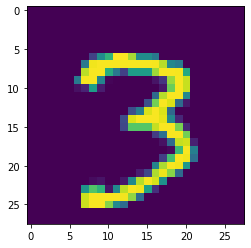

In [59]:
# A '2'
image = data[51][0]
plt.imshow(image)

##### 